<div class="alert alert-block alert-info">
<b>IMPORTS</b>
</div>

In [1]:
#Code to connect your google drive with google colaboratory
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


<div class="alert alert-block alert-info">
<b>Code Citation</b>
</div>

In [ ]:
# Only the Bag of visual words code has been taken and modifed with.
# https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f

In [5]:
# Packages
import numpy as np
import cv2 as cv
import os
import glob
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
import time
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from fastai.vision import *
%matplotlib inline
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from sklearn.metrics import precision_score, recall_score, f1_score
!pip install --upgrade fastai

In [16]:
# Defining the path
path = '/content/drive/MyDrive/Assignment/Images'

# Files and reading the data
digits_image = os.path.join(path, 'digits.png')
digit_image = cv.imread(digits_image, cv.IMREAD_GRAYSCALE)

# Printing the digit name
print("The image file name is:", os.path.basename(digits_image))
print(f"The shape of the image is {digit_image.shape}")

# Training and Test Paths
training_folder_path = os.path.join(path, "Train")
testing_folder_path = os.path.join(path, "Test")

# Create Train and Test folders if they don't exist
if os.path.isfile(training_folder_path) and os.path.isfile(training_folder_path) == False:
    os.mkdir(training_folder_path)
    os.mkdir(testing_folder_path)


The image file name is: digits.png
The shape of the image is (1000, 2000)


In [9]:
# Create Arrays of 20 by 20 patch
all_digit_numbers = np.empty((0,20,20),dtype=np.uint8)
training_digits = np.empty((0,20,20),dtype=np.uint8)
test_digits = np.empty((0,20,20),dtype=np.uint8)

# Format
training_images, testing_images = [],[]

# LOCATE DIGITS
# 10 DIGITS
for k in range(10):
  # 5 ROWS
    for r in range(5):
      # 100 NUMBERS
        for i in range(100):
          # IMAGE SLICING
            digit = digit_image[(k*5+r)*20:(k*5+r+1)*20, i*20:(i+1)*20]
            #  Adding another dimension due to the array's initial size
            digit = np.expand_dims(digit, axis=0)
            # ADD TO THE BIG ARRAY
            all_digit_numbers = np.append(all_digit_numbers, digit, axis=0) # Just in case we need to the full size
            if r < 4:
                # Appending 80%
                training_digits = np.append(training_digits, digit, axis=0)# Append 4 rows for training
            else:
                # Appending 20%
                test_digits = np.append(test_digits, digit, axis=0)  # Append the last row for testing

training_elements, testing_elements = 0,0

for i in range(10): # 0-9 digits
    counter = 1
    for j in range(4): # 4 rows
        for k in range(100):
            # row1 = 0-100 # row2 = 100-200 # row3 = 200-300# row4 = 300-400
            filename = f"digit_{i}_row{j+1}_id_{counter}.jpg"
            # 0-3999 == 4000 elements which is 80 percent for training
            image = os.path.join(training_folder_path, filename)
            # If image does not exists, then create it
            if os.path.isfile(image) == False:
                cv.imwrite(image, np.uint8(training_digits[training_elements])) # Saving the image in the Train folder 0 till 4000
            # APPEND TO TRAINING ARRAY
            training_images.append(np.uint8(training_digits[training_elements]))
            counter += 1
            training_elements += 1 # till 4000 elements

    counter = 1
    for l in range(100): # There's only 1000 elements for testing
        filename = f"digit_{i}_id_{counter}.jpg"
        testing_folder_path_1 = os.path.join(testing_folder_path, filename)
        # If image does not exists, then create it
        if os.path.isfile(testing_folder_path_1) == False:
            cv.imwrite(testing_folder_path_1, np.uint8(test_digits[testing_elements])) # Saving the image in the Test folder 0 till 2000
        # APPEND TO TESTING ARRAY
        testing_images.append(np.uint8(test_digits[testing_elements]))
        counter += 1
        testing_elements += 1

# all_digit_numbers.shape #Confirming we have (5000, 20, 20)
print(all_digit_numbers.shape)
print(training_digits.shape)
print(test_digits.shape)

# At the moment the images are 20 x 20
# Convert it to a row vector of 400
train_array = np.array(training_images).reshape(-1,400).astype(np.float32)
test_array = np.array(testing_images).reshape(-1,400).astype(np.float32)

print(f"The size of the training array is: {train_array.shape}")
print(f"The size of the testing array is: {test_array.shape}")

(5000, 20, 20)
(4000, 20, 20)
(1000, 20, 20)
The size of the training array is: (4000, 400)
The size of the testing array is: (1000, 400)


<div class="alert alert-block alert-info">
<b>K-Nearest Neighbour: </b> Classification accuracy
</div>

The K-value 1 produces an accuracy of 93.80% with an error rate of 6.20% and took 0.27 seconds to execute
The K-value 3 produces an accuracy of 93.10% with an error rate of 6.90% and took 0.30 seconds to execute
The K-value 5 produces an accuracy of 92.70% with an error rate of 7.30% and took 0.30 seconds to execute
The K-value 7 produces an accuracy of 93.00% with an error rate of 7.00% and took 0.30 seconds to execute
The K-value 9 produces an accuracy of 92.80% with an error rate of 7.20% and took 0.30 seconds to execute
The K-value 11 produces an accuracy of 92.70% with an error rate of 7.30% and took 0.32 seconds to execute
The K-value 13 produces an accuracy of 92.00% with an error rate of 8.00% and took 0.30 seconds to execute
The K-value 15 produces an accuracy of 92.40% with an error rate of 7.60% and took 0.28 seconds to execute
The K-value 17 produces an accuracy of 92.20% with an error rate of 7.80% and took 0.27 seconds to execute
The K-value 19 produces an accuracy of 92.

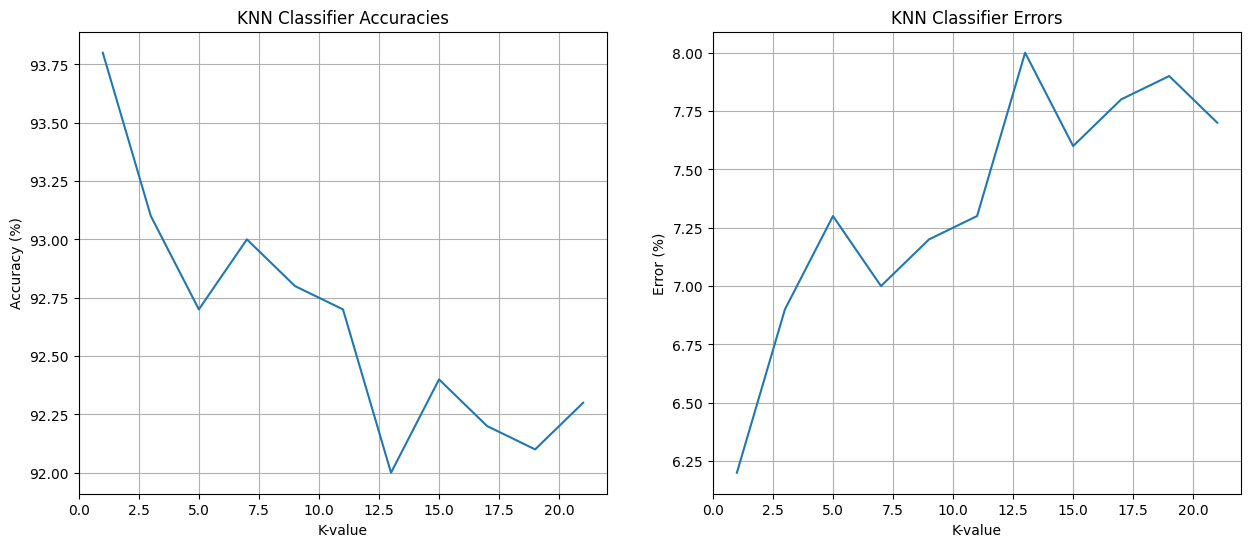

In [10]:

# create an array from 0-9
c = np.arange(10)

# 400 because each digit has 400 variants so 0-9 digits are balanced with 4000 samples
train_labels = np.repeat(c,400)[:,np.newaxis]

# 100 is the same as above but for 10 digits with 1000 samples
test_labels = np.repeat(c,100)[:,np.newaxis]
# The [:,np.newaxis] turn it into a 1 row vector

# INITIALISE K-NN ALGORITHM
knn = cv.ml.KNearest_create()
# TRAIN K-NN
knn.train(train_array, cv.ml.ROW_SAMPLE, train_labels)

error_list, k_values,accuracy_list = [],[],[]
optimal_result = 0

for i in range(1,22, 2):
   # ODD values to avoid ties due to the nature of even numbers
    k_values.append(i)

# USE K-NN FOR THE FOLLOWING K VALUES
for i, k_value in enumerate(k_values):
    # RECORDING TIME
    start_time = time.time()
    # FIND NEAREST NEIGHBOUR
    ret,result,neighbours,dist = knn.findNearest(test_array, k=k_value)
    end_time = time.time()
    elapsed_time = end_time - start_time

    # ACCURACY
    matches = result == test_labels
    correct = np.count_nonzero(matches)
    accuracy = correct*100.0/result.size
    accuracy_list.append(accuracy)

    # FIND THE ERROR RATE FOR K
    error_rate = 100 - accuracy
    error_list.append(error_rate)
    if i == 0:
        optimal_result = result
    # PRINT THE RESULTS
    print(f"The K-value {k_value } produces an accuracy of {accuracy:.2f}% with an error rate of {error_rate:.2f}% and took {elapsed_time:.2f} seconds to execute")

# CREATE A FIGURE
plt.figure(figsize=(15, 6))

# Create the first subplot for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(k_values, accuracy_list)
plt.xlabel("K-value")
plt.ylabel("Accuracy (%)")
plt.title('KNN Classifier Accuracies')
plt.grid(True)

# Create the second subplot for error
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(k_values, error_list)
plt.xlabel("K-value")
plt.ylabel("Error (%)")
plt.title('KNN Classifier Errors')
plt.grid(True)

# SHOW THE PLOTS
plt.show()

<div class="alert alert-block alert-info">
<b>K-Nearest Neighbour:</b> Confusion Matrix and Multi-class classification
</div>

True label vs Prediction


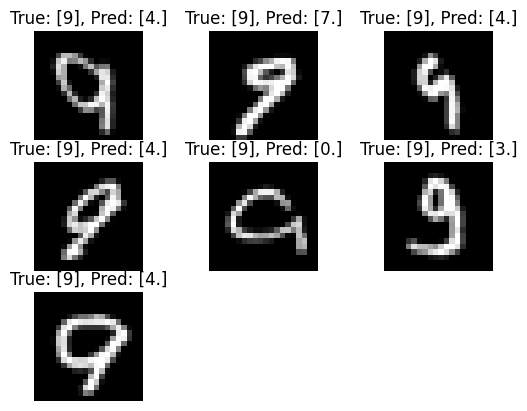

There are 1000 samples being tested.

KNN PERFORMANCE METRICS
 +-------+-----+----+----+-----+-------------------+-----------+--------+----------+------------+
| Class |  TP | FN | FP |  TN | STANDARD ACCURACY | PRECISION | RECALL | F1 SCORE | ERROR RATE |
+-------+-----+----+----+-----+-------------------+-----------+--------+----------+------------+
|   0   | 100 | 0  | 5  | 895 |       99.5%       |   0.952   |  1.0   |  0.975   |    0.5%    |
|   1   |  97 | 3  | 4  | 896 |       99.3%       |    0.96   |  0.97  |  0.965   |    0.7%    |
|   2   |  87 | 13 | 2  | 898 |       98.5%       |   0.978   |  0.87  |  0.921   |    1.5%    |
|   3   |  89 | 11 | 7  | 893 |       98.2%       |   0.927   |  0.89  |  0.908   |    1.8%    |
|   4   |  95 | 5  | 8  | 892 |       98.7%       |   0.922   |  0.95  |  0.936   |    1.3%    |
|   5   |  92 | 8  | 8  | 892 |       98.4%       |    0.92   |  0.92  |   0.92   |    1.6%    |
|   6   |  99 | 1  | 5  | 895 |       99.4%       |   0.952   | 

<AxesSubplot: >

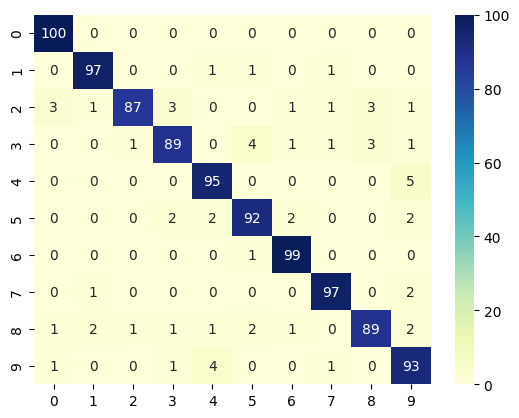

In [11]:
# Confusion Matrix and Classification accuracy for Model Performance
# ROW 0 FOR TABLE
table_0 = PrettyTable(["Class", "TP", "FN", "FP", "TN", "STANDARD ACCURACY", "PRECISION", "RECALL", "F1 SCORE", "ERROR RATE"])

# CONFUSION MATRIX
confusion_matrix_1 = confusion_matrix(test_labels, optimal_result)
classes = confusion_matrix_1.shape[0] # returns the number of unique classses which is basically 10
SAMPLES = len(test_labels)

# Initialize storage for class-wise accuracy
TARGET_CLASS = np.arange(10)
class_accuracy = []

for i in range(classes):

    # True Positive -> Precision = TP//(TP + FP)
    TP = 0
    for j in range(len(test_labels)):
        if test_labels[j] == optimal_result[j] == TARGET_CLASS[i]:
            TP += 1

    # False Positive Rate = FP//(TP + FP)
    FP = np.sum(confusion_matrix_1[:,i]) - TP #Get the remaining from the column

    # False Negative Rate = FN/(FP + TN)
    FN = np.sum(confusion_matrix_1[i,:]) - TP

    # True Negatives-> Specificity = TN/(FP + TN)
    TN = np.sum(confusion_matrix_1) - (FN + FP + TP)

    PRECISION = round(TP/(TP + FP), 3)
    RECALL = TP/(TP + FN)
    F1_SCORE = round((2*((PRECISION*RECALL)/(PRECISION+RECALL))), 3)

    # Class-wise Accuracy
    STANDARD_ACCURACY = (TP + TN) / (TP + FP + TN + FN) * 100
    ERROR_RATE = f"{round((100 - STANDARD_ACCURACY), 2)}%"

    # SAVING DATA INTO TABLE
    data = [[i, TP, FN, FP, TN, f"{STANDARD_ACCURACY}%", PRECISION, RECALL, F1_SCORE, ERROR_RATE]]
    for row in data:
        table_0.add_row(row)

misclassified_classes = []
for i, (true, pred) in enumerate(zip(test_labels, optimal_result)):
    if true != pred:
      # SHOWING MISCLASSIFIED 9'S
        if true == 9:
            misclassified_classes.append(i)

# PLOT MISCLASSIFIED IMAGES
for number, index in enumerate(misclassified_classes[:9]):
    plt.subplot(3, 3, number+1)
    plt.imshow(testing_images[index], cmap='gray')  # Assuming testing_images is your array of test images
    plt.title(f'True: {test_labels[index]}, Pred: {optimal_result[index]}')
    plt.axis('off')
print("True label vs Prediction")
plt.show()

# PRINT TABLE
print(f"There are {SAMPLES} samples being tested.")
print("\nKNN PERFORMANCE METRICS\n", table_0)
# PLOT CONFUSION MATRIX
sns.heatmap(confusion_matrix_1, annot=True, fmt="d", cmap="YlGnBu")
